# Importing the Dataset:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


# Dataframe Description:

Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

# Identifying the type of problem: 

After looking at the dataset, we can say that the values are contionous which we want to predict(i.e. Happiness Score).So, the problem is of Linear Regression.

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Observation : Country and Region columns have string(object) data type, later we will use encoder for it. Happiness rank is an ordinal data (type=int), while other columns have regressor (float) data.

In [5]:
df.shape

(158, 12)

From shape we can say that, we have 158 rows and 12 columns.

Checking null values and datatype together

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856822,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


If we closely look at the data, their is a significant difference between 75th percentile and max value in the columns 'Standard Error', 'Economy(GDP per Capita)', 'Trust(Government Corruption)' and 'Generosity'. Later we will check through boxplot if their are any outliers present or not.

# EDA

Data Visualization 

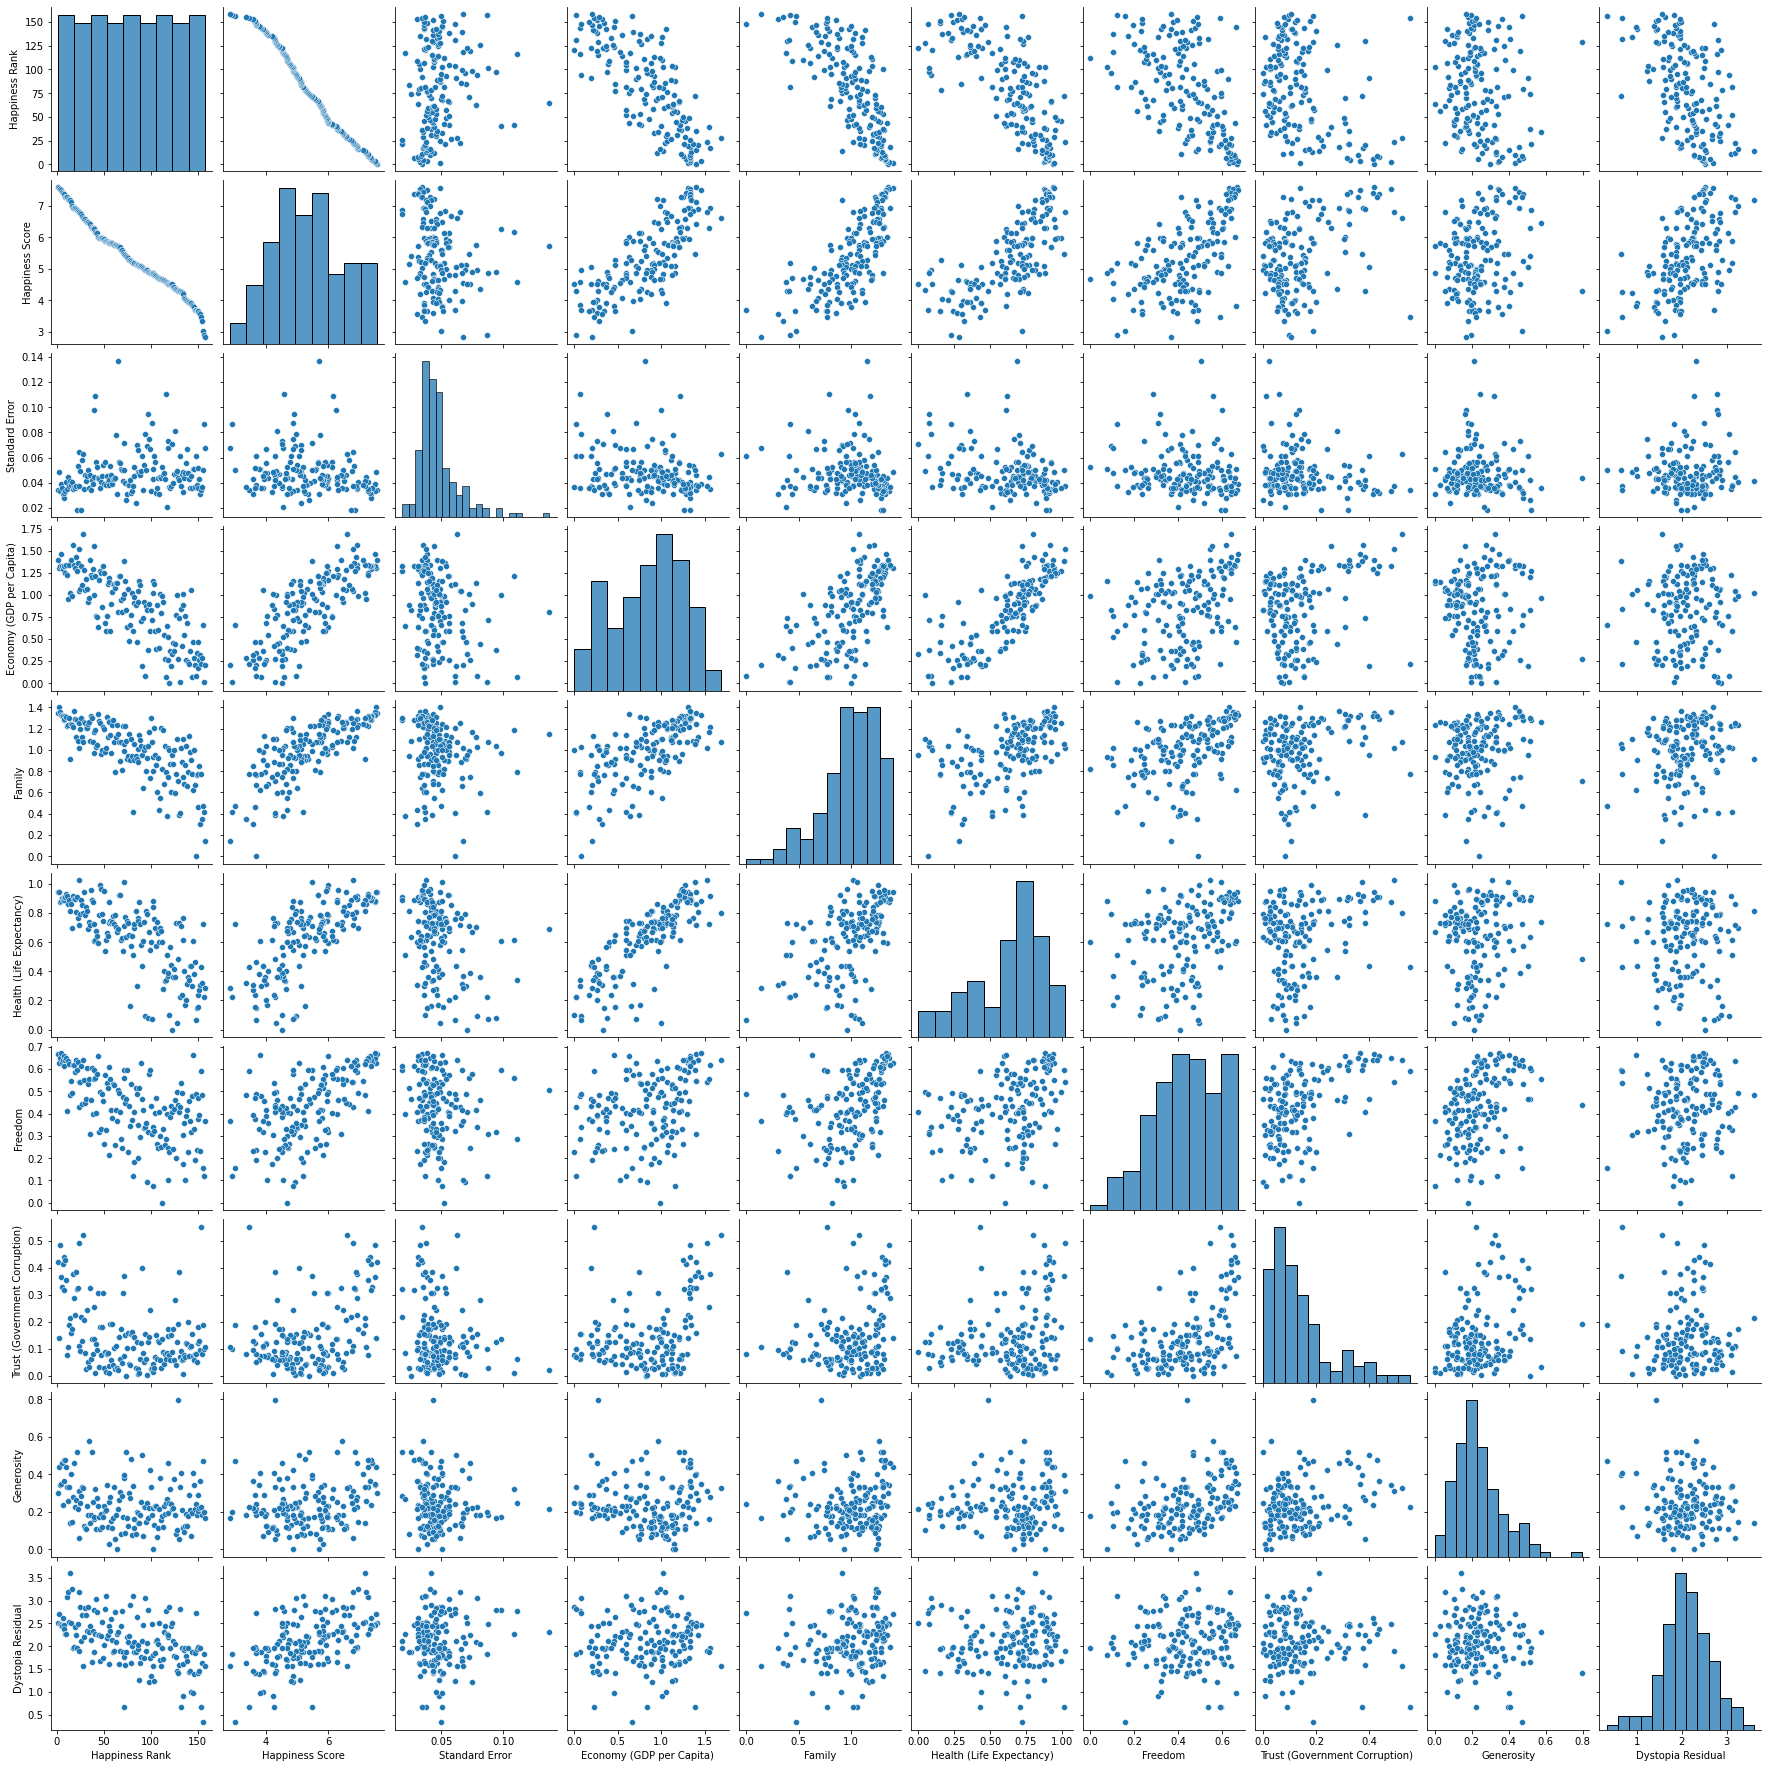

In [9]:
sns.pairplot(df)

Take a glance at pairplots, If you compare Happiness Score with all other factors (except happiness rank), it shows positive relationship.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

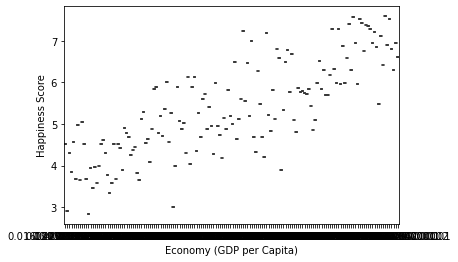

In [10]:
sns.boxplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df,palette="coolwarm")

Boxplot is showing ,if economy is good then it have positive impact on Happiness Score.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Trust (Government Corruption)'>

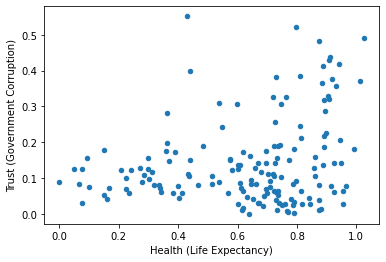

In [11]:
df.plot.scatter(x='Health (Life Expectancy)', y='Trust (Government Corruption)')

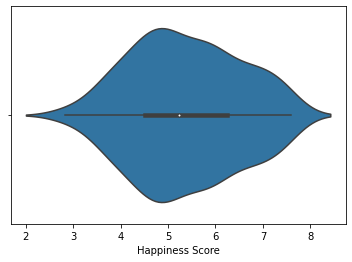

In [12]:
sns.violinplot(x='Happiness Score',data=df)
plt.show()

Violin Plot clearly depicts that happiness score has subsided maximum (density estimation) in the range between 4.5 to 6.3 approximately.

Since, country and region columns have the string values , we will use encoding technique i.e.Ordinal Encoding (on whole dataframe)

## Encoding of Dataframe 

In [13]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [14]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [15]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,45.0,9.0,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,99.0,9.0,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,134.0,9.0,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,100.0,0.0,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,6.0,0.0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### Correlation of the columns with the target columns:

In [16]:
corr_hmap=df.corr()
corr_hmap

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


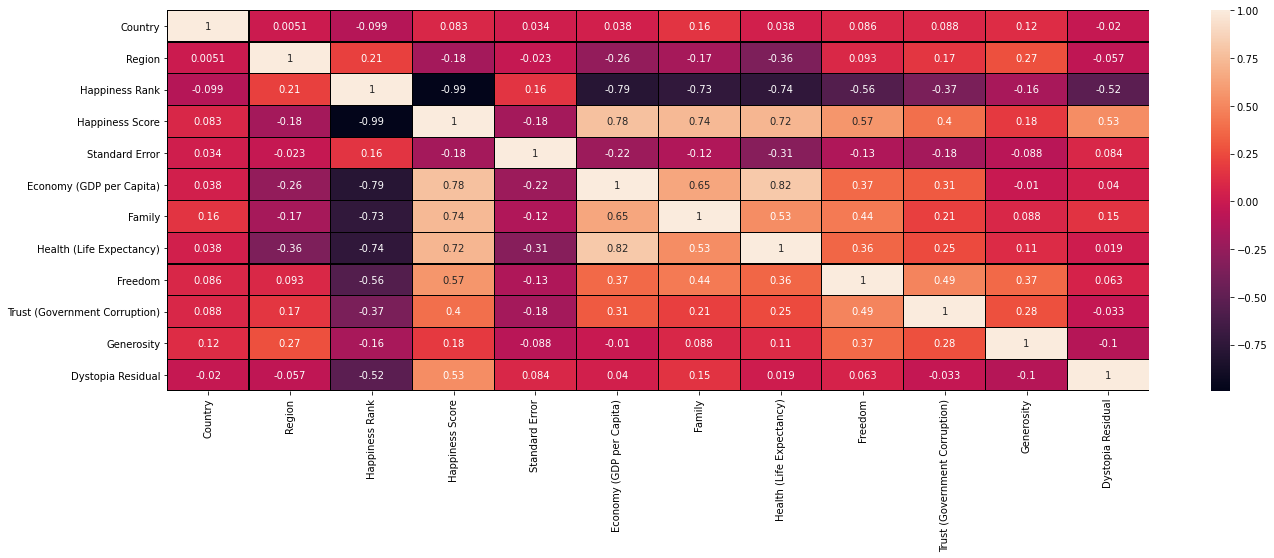

In [17]:
plt.figure(figsize=(22,7))
sns.heatmap(corr_hmap,annot=True,linewidths=0.1,linecolor="black")
plt.show()

Heat map depicts that Target column (happiness score) showing positive relationship (not too much positive) with other six important factors as well as absence of multicolinear relationship between variables.

## Checking of outliers

Country                             AxesSubplot(0.125,0.536818;0.110714x0.343182)
Region                           AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Happiness Rank                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Family                                 AxesSubplot(0.125,0.125;0.110714x0.343182)
Health (Life Expectancy)            AxesSubplot(0.257857,0.125;0.110714x0.343182)
Freedom                             AxesSubplot(0.390714,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.523571,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.656429,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

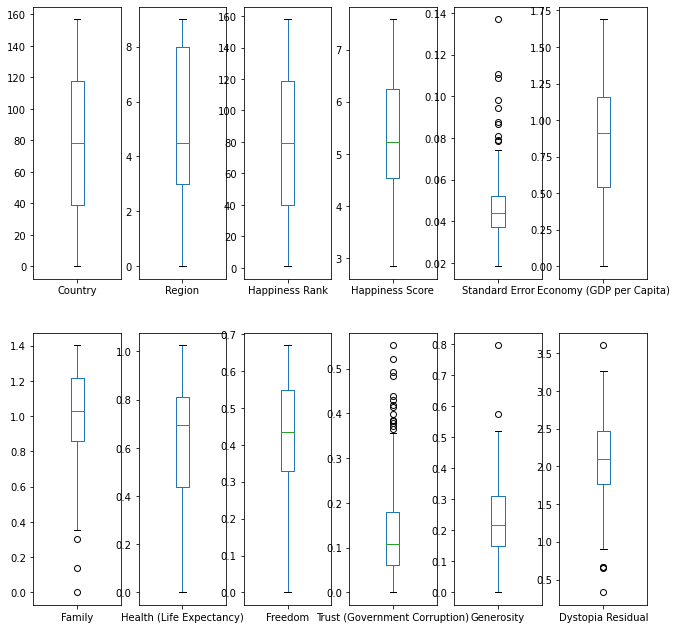

In [18]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(11,11))

As, we observed in the statistical description part that there are outliers in some of the columns which is justified by the box plot of every column here.
As outliers are more in case of 'Standard Error' and 'Trust' columns, we will check the loss of data in that case.

### Considering the outlier removal

In [19]:
df.shape

(158, 12)

In [20]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

In [21]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,45.0,9.0,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,99.0,9.0,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,134.0,9.0,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,100.0,0.0,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,6.0,0.0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [22]:
df_new_z.shape

(149, 12)

In [23]:
#Percentage loss of data:

In [24]:
Data_loss=((158-149)/158)*100      
Data_loss                            #We can afford this much of data loss as it is below 8%

5.69620253164557

### Checking for Skweness

In [25]:
df_new_z.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Keeping +/-0.5 as the range for skewness, here are the columns which does not lie within this range.

>Standard Error, Family, Health(Life Expectancy), Trust(Government Corruption) and Generosity

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

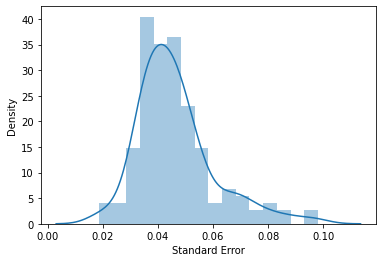

In [26]:
sns.distplot(df_new_z['Standard Error'], kde=True)

<AxesSubplot:xlabel='Family', ylabel='Density'>

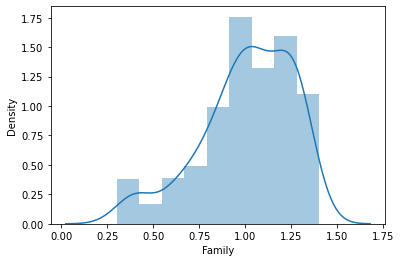

In [27]:
sns.distplot(df_new_z['Family'], kde=True)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

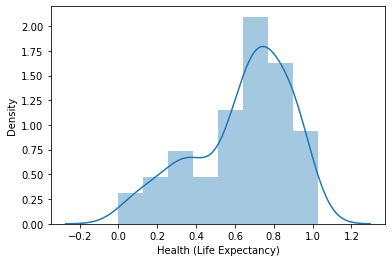

In [28]:
sns.distplot(df_new_z['Health (Life Expectancy)'], kde=True)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

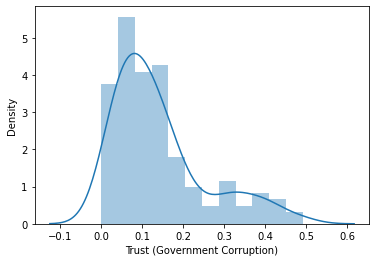

In [29]:
sns.distplot(df_new_z['Trust (Government Corruption)'], kde=True)

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

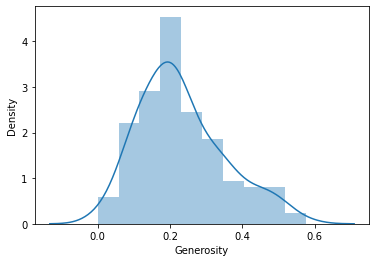

In [30]:
sns.distplot(df_new_z['Generosity'], kde=True)

## Removing Skewness

In [31]:
df_new_z['Standard Error']=np.log(df_new_z['Standard Error'])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

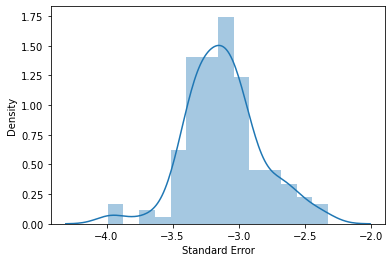

In [32]:
sns.distplot(df_new_z['Standard Error'], kde=True)

In [33]:
df_new_z['Family']=np.log(df_new_z['Family'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

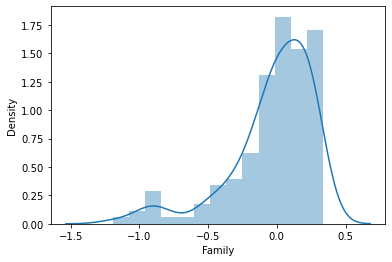

In [34]:
sns.distplot(df_new_z['Family'], kde=True)

In [35]:
df_new_z['Health (Life Expectancy)']=np.cbrt(df_new_z['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

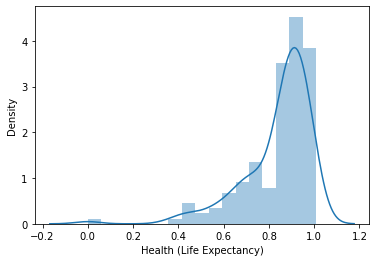

In [36]:
sns.distplot(df_new_z['Health (Life Expectancy)'], kde=True)

In [37]:
df_new_z['Trust (Government Corruption)']=np.cbrt(df_new_z['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

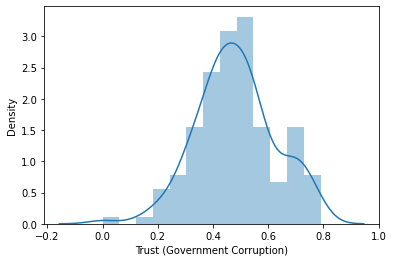

In [38]:
sns.distplot(df_new_z['Trust (Government Corruption)'], kde=True)

In [39]:
df_new_z['Generosity']=np.cbrt(df_new_z['Generosity'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

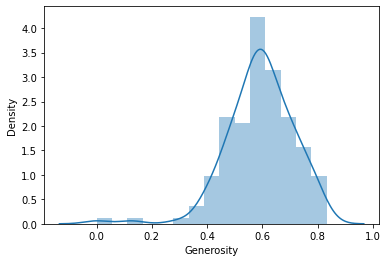

In [40]:
sns.distplot(df_new_z['Generosity'], kde=True)

## Scaling the data using Standard Scaler:

Here I am using Standard Scaler because the data is now almost normally distributed and no large differences between values of the dataset.

Standard Scaler should be applied on whole dataset, thereafter only we will separate x and y variables.

In [41]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()
Newdata=mn.fit_transform(df_new_z)
Newdata

array([[ 1.26826032,  1.29683671, -1.71390512, ...,  1.88683529,
         0.62010055,  0.7568764 ],
       [-0.41741515,  1.29683671, -1.69153548, ...,  0.27941205,
         1.37425481,  1.10929978],
       [-0.87714482,  1.29683671, -1.66916583, ...,  2.14203323,
         0.88302876,  0.70850719],
       ...,
       [-1.68714472,  0.63509469,  1.68628086, ..., -0.15304962,
         1.01352168, -0.32213507],
       [-1.40255016,  0.9659657 ,  1.73102015, ..., -0.35566049,
        -0.20234572, -0.9307015 ],
       [-1.22741505,  0.9659657 ,  1.77575944, ..., -0.11531156,
        -0.08023263, -0.54943602]])

In [42]:
newData=pd.DataFrame(Newdata)
newData

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.268260,1.296837,-1.713905,1.947945,-0.915655,1.381916,1.077982,0.937316,1.583704,1.886835,0.620101,0.756876
1,-0.417415,1.296837,-1.691535,1.924469,0.336541,1.138324,1.202544,0.951923,1.338953,0.279412,1.374255,1.109300
2,-0.877145,1.296837,-1.669166,1.893769,-1.001589,1.198220,1.104536,0.781010,1.476027,2.142033,0.883029,0.708507
3,0.611504,1.296837,-1.646796,1.889255,-0.466245,1.543526,1.032970,0.806264,1.611371,1.646273,0.914382,0.657485
4,-1.161739,-0.026647,-1.624427,1.803478,-0.773374,1.200315,1.012538,0.854489,1.366887,1.477326,1.476816,0.631620
5,-0.702010,1.296837,-1.602057,1.784516,-1.204435,1.107109,1.001830,0.815532,1.424882,1.861279,0.197456,0.951899
6,0.480152,1.296837,-1.579687,1.759235,-1.605465,1.208461,0.906530,0.824370,1.252426,1.420295,1.558989,0.658229
7,1.246368,1.296837,-1.557318,1.746594,-1.185600,1.214332,0.929049,0.866747,1.545329,1.964016,1.000142,0.477828
8,0.502044,-1.681002,-1.534948,1.676166,-0.956805,1.003481,1.005305,0.860905,1.409519,1.926160,1.554070,0.273700
9,-1.555793,-1.681002,-1.512578,1.674361,-0.288347,1.219168,0.979489,0.914694,1.488398,1.606060,1.371003,0.277918


## Separating Independent Variable (x) and Target Variable (y)

In [43]:
y_scaled=newData.iloc[:,3:4]
y_scaled.head()

,3
0,1.947945
1,1.924469
2,1.893769
3,1.889255
4,1.803478


In [45]:
x_scaled=newData.drop(newData.columns[[3]],axis=1)
x_scaled.head()

,0,1,2,4,5,6,7,8,9,10,11
0,1.268260,1.296837,-1.713905,-0.915655,1.381916,1.077982,0.937316,1.583704,1.886835,0.620101,0.756876
1,-0.417415,1.296837,-1.691535,0.336541,1.138324,1.202544,0.951923,1.338953,0.279412,1.374255,1.109300
2,-0.877145,1.296837,-1.669166,-1.001589,1.198220,1.104536,0.781010,1.476027,2.142033,0.883029,0.708507
3,0.611504,1.296837,-1.646796,-0.466245,1.543526,1.032970,0.806264,1.611371,1.646273,0.914382,0.657485
4,-1.161739,-0.026647,-1.624427,-0.773374,1.200315,1.012538,0.854489,1.366887,1.477326,1.476816,0.631620


In [46]:
x_scaled.shape

(149, 11)

In [47]:
y_scaled.shape

(149, 1)

## Train Test Split and Finding Best Random State

In [48]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [81]:
x_scaled_train,x_scaled_test,y_scaled_train,y_scaled_test=train_test_split(x_scaled,y_scaled,test_size=.20,random_state=42)

In [82]:
x_scaled_train.shape

(119, 11)

In [83]:
y_scaled_train.shape

(119, 1)

In [84]:
x_scaled_test.shape

(30, 11)

In [85]:
y_scaled_test.shape

(30, 1)

### Training Phase:

In [86]:
lr=LinearRegression()
lr.fit(x_scaled_train,y_scaled_train)

LinearRegression()

In [87]:
lr.coef_

array([[-0.0042008 ,  0.01706662, -0.39494158, -0.02342634,  0.27330369,
         0.13274147,  0.08672885,  0.08927267,  0.06136766,  0.0682386 ,
         0.29396696]])

In [88]:
lr.intercept_

array([0.00373329])

In [89]:
lr.score(x_scaled_train,y_scaled_train)

0.9945179879033788

Here, I am getting Model Accuracy (Training Accuracy) = 99.45 %

I chose random_state = 42, beacause it is giving me the positive intercept value with good lr score.(I have tried with the combination of random state values viz, 13,33 and 12 other than 42). 

### Prediction Phase:

In [90]:
pred=lr.predict(x_scaled_test)
print("Predicted Result:", pred)
print("Actual Result:", y_scaled_test)

Predicted Result: [[-0.1312748 ]
 [ 1.39754548]
 [-0.84965249]
 [-0.14223506]
 [-0.06416578]
 [ 0.96916808]
 [ 0.21794651]
 [-1.51129917]
 [-0.00935751]
 [-0.31746069]
 [-0.63048948]
 [ 1.59313459]
 [ 0.85644092]
 [ 1.53495438]
 [ 1.36541088]
 [ 0.37716445]
 [-1.34675954]
 [ 0.03790377]
 [ 0.40940768]
 [-1.16239366]
 [ 0.97011668]
 [-0.93935609]
 [ 1.11081445]
 [-1.04139106]
 [-1.24429436]
 [-1.52936846]
 [-0.67870006]
 [-0.62596411]
 [ 0.56652131]
 [ 0.96999807]]
Actual Result:             3
73  -0.129669
18   1.361048
117 -0.828527
78  -0.214543
76  -0.196485
31   0.945706
64   0.158362
140 -1.488559
68   0.040080
82  -0.275941
109 -0.711148
12   1.598515
36   0.784084
9    1.674361
19   1.328543
56   0.346169
136 -1.377501
69  -0.000551
55   0.356101
131 -1.261024
29   0.970988
123 -0.991052
26   1.119969
127 -1.063285
128 -1.093985
144 -1.602327
110 -0.719274
101 -0.579322
45   0.492442
30   0.952929


In [97]:
print('Mean Absolute Error:', mean_absolute_error(y_scaled_test,pred))
print('Mean Squared Error:', mean_squared_error(y_scaled_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_scaled_test,pred)))
print('Model Accuracy:', r2_score(y_scaled_test,pred))

Mean Absolute Error: 0.05108822907008879
Mean Squared Error: 0.00408581188712584
Root Mean Squared Error: 0.06392035581194648
Model Accuracy: 0.995607320221512


Here, I am getting Model Accuracy (Testing Accuracy) = 99.56 %

### Checking Over-fitting and under-fitting through Cross-Validation :

In [103]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x_scaled,y_scaled,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6299002953117075

From above we can say that, the model was overfitting as cv_mean denotes the mean accuracy. Hence, we will proceed with next set of algorithms and again will check the mean cv score.

In [106]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet

In [111]:
model=[SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),ElasticNet()]

for m in model:
    m.fit(x_scaled_train,y_scaled_train)
    m.score(x_scaled_train,y_scaled_train)
    predm=m.predict(x_scaled_test)
    print(r2_score(y_scaled_test,pred))

0.995607320221512
0.995607320221512
0.995607320221512
0.995607320221512


In [118]:
model=[SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),ElasticNet()]

for m in model:
    m.fit(x_scaled_train,y_scaled_train)
    m.score(x_scaled_train,y_scaled_train)
    predm=m.predict(x_scaled_test)
    print(cross_val_score(m,x_scaled,y_scaled,cv=5))
    print(cv_score.mean())

[-10.91455129   0.21474764   0.80488023  -1.44871775  -6.8732589 ]
-14.160462502750097
[-3.55000413 -0.10373455 -0.13497802 -0.4924063  -2.79107855]
-14.160462502750097
[-9.58342899 -2.72578384 -1.81426129 -6.1494105  -4.4679861 ]
-14.160462502750097
[-36.97676011  -2.45052205   0.30049775 -10.35866361 -21.31686449]
-14.160462502750097


In [ ]:
Getting Negative CV mean score, so we will use regularization technique.

## Regularization Technique:

In [293]:
from sklearn.linear_model import Lasso
lsf = Lasso(alpha=0,random_state=1,max_iter=60,selection='cyclic')
lsf.fit(x_scaled_train,y_scaled_train)
lsf.score(x_scaled_train,y_scaled_train)
pred_lsf = lsf.predict(x_scaled_test)
print(r2_score(y_scaled_test,pred_lsf))

0.9954451832716088


In [294]:
cv_score=cross_val_score(lsf,x_scaled,y_scaled,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.66196810716089

## Ensemble technique:

In [278]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor(n_estimators=10,criterion='mse',max_features='auto',random_state=0)
rf.fit(x_scaled_train,y_scaled_train)
rf.score(x_scaled_train,y_scaled_train)
pred_rf = rf.predict(x_scaled_test)
print(r2_score(y_scaled_test,pred_rf))

0.9949195171612542


In [279]:
cv_score=cross_val_score(rf,x_scaled,y_scaled,cv=5)
cv_mean=cv_score.mean()
cv_mean

-1.591347598048869

## Selecting Best Algorithm:

As we have seen, we got cross validation score maximum in Laso other than all algorithms used. So, we will tune the perameters of the Laso technique only. 

## Hyperparameter Tuning:

In [286]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [287]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'max_iter':list(range(0,1000)),'selection':['cyclic','random']}
ls = Lasso()
gd = GridSearchCV(ls,parameters)
gd.fit(x_scaled_train,y_scaled_train)
print(gd.best_params_)

{'alpha': 0.01, 'max_iter': 67, 'random_state': 2, 'selection': 'random'}


In [289]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.01,max_iter=67,random_state=2,selection='random')
ls.fit(x_scaled_train,y_scaled_train)
ls.score(x_scaled_train,y_scaled_train)
pred_ls = ls.predict(x_scaled_test)

lsr2 = r2_score(y_scaled_test,pred_ls)
print('R2 Score:',lsr2*100)

lsscore = cross_val_score(ls,x_scaled,y_scaled,cv=5)
lscross = lsscore.mean()
print('Cross Val Score:',lscross*100)

R2 Score: 99.51282453457519
Cross Val Score: 60.10684829028432


Observation : Selecting the model "lsf" (manually selected parameters) as it is giving Cross Validation Score 0.6619(66.19), which is better than model "ls" (tuned).

# Saving The Model:

In [295]:
import pickle
filename = 'happinessscore.pkl'
pickle.dump(lsf, open(filename, 'wb'))

# Conclusion :

In [298]:
loaded_model = pickle.load(open('happinessscore.pkl', 'rb'))
result = loaded_model.score(x_scaled_test,y_scaled_test)
prediction=loaded_model.predict(x_scaled_test)
print(result)
prediction

0.9954451832716088


array([-0.11190537,  1.39477356, -0.8793443 , -0.13473276, -0.05818435,
        0.96403029,  0.21987357, -1.52178615,  0.02593536, -0.31875241,
       -0.66015436,  1.57457372,  0.8599581 ,  1.53809715,  1.36142439,
        0.38863013, -1.36591427,  0.05028727,  0.4044536 , -1.18673819,
        0.97240953, -0.96206343,  1.11142137, -1.0875232 , -1.2717184 ,
       -1.54577646, -0.71476744, -0.63945733,  0.58542122,  0.98087373])